In [1]:
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn import tree
from sklearn import metrics

In [2]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./iris_dataset.csv', sep=";") # load a pandas dataframe from csv in current directory
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
classes = df.species
objects = df.drop(['species'],axis=1)

## Average method

In [4]:
# Compute the hierarchical aggregation:
Z = sch.linkage(objects, method='average', metric='euclidean')
# method='average'/'single'/'complete'
# method of distance computations - center/min/max

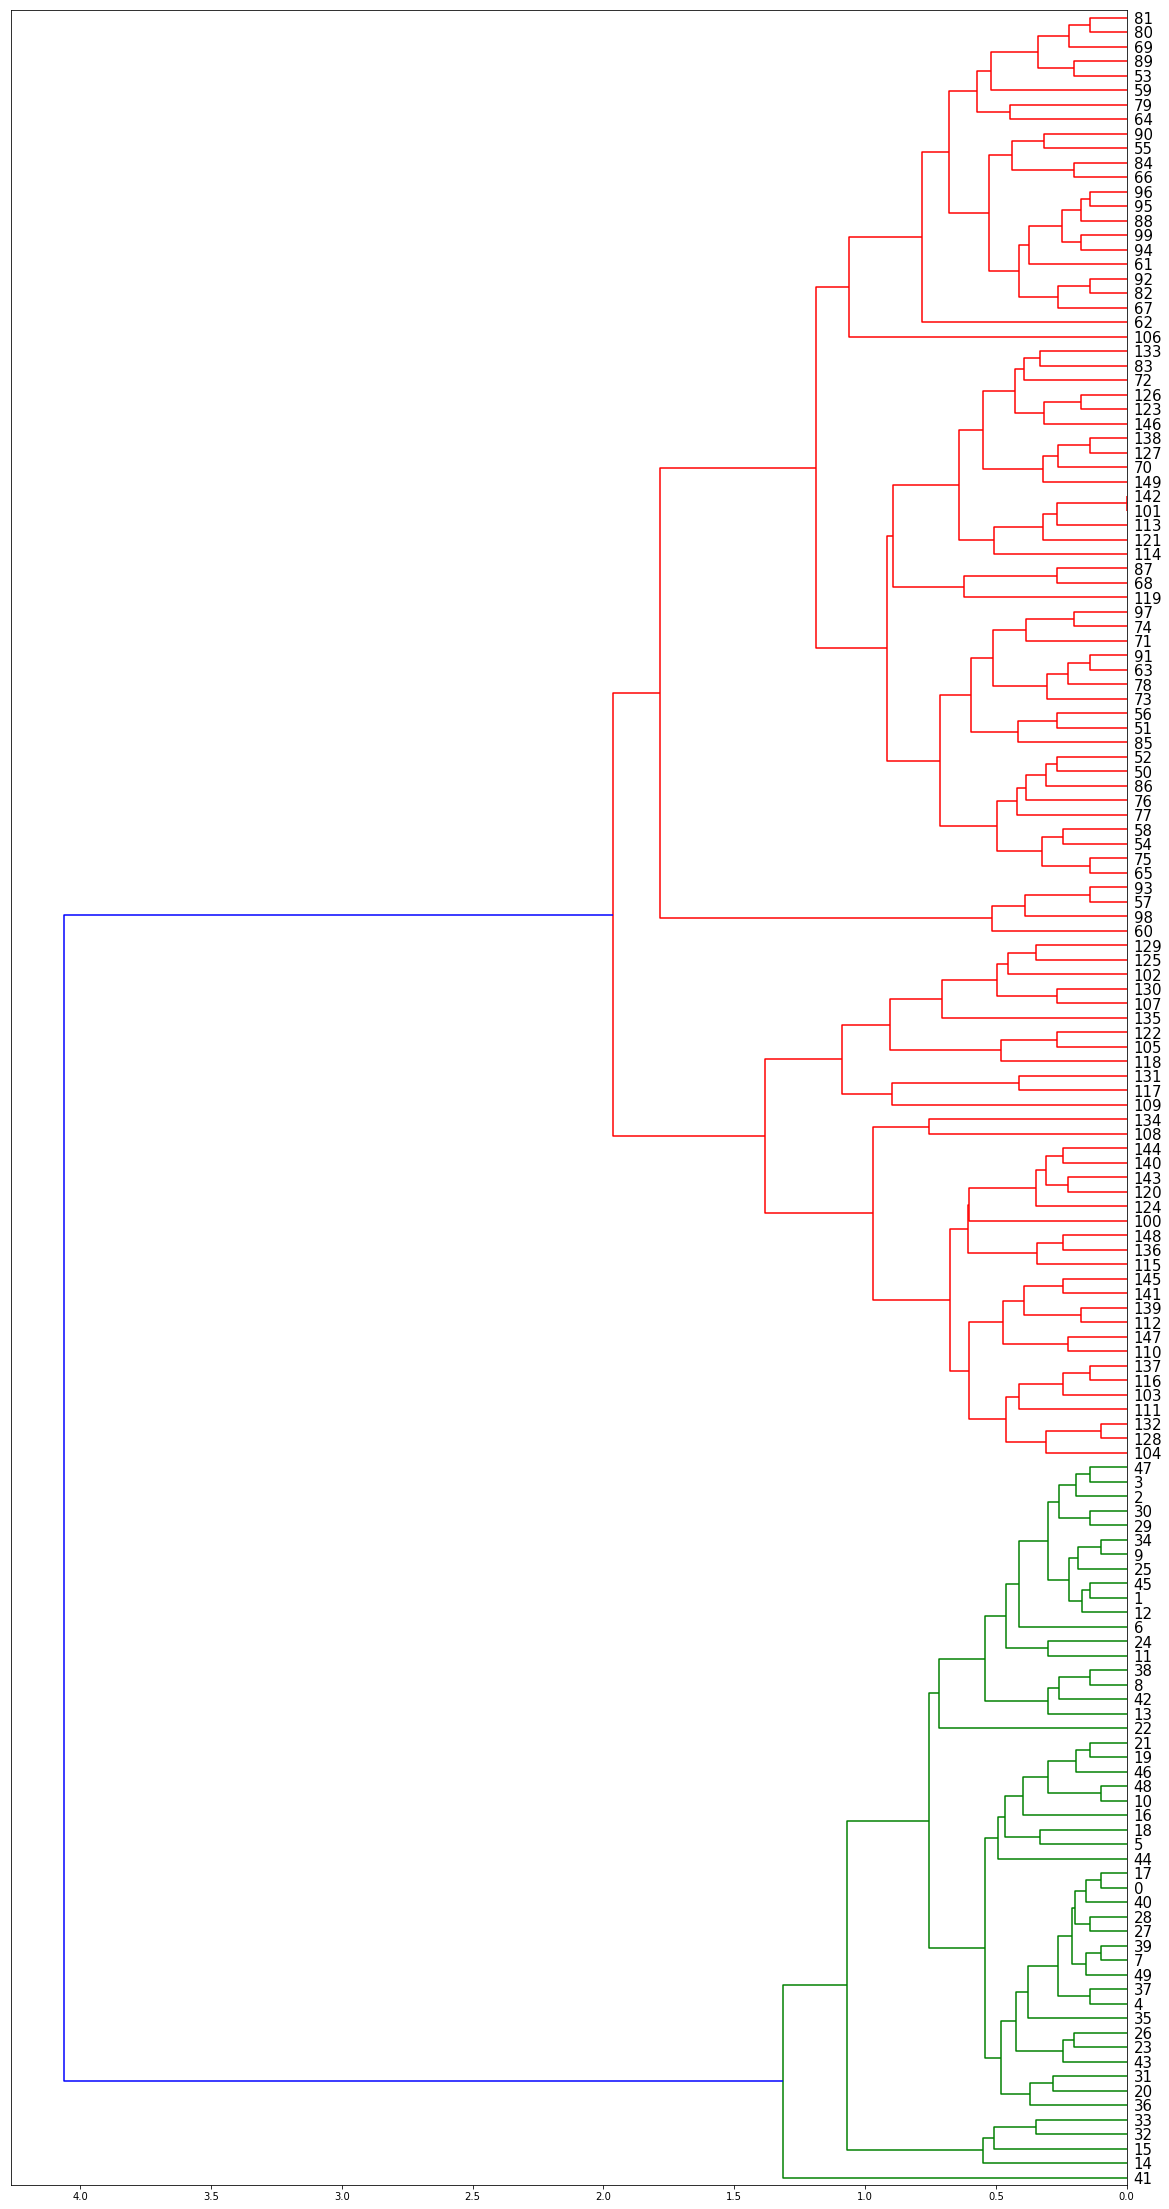

In [5]:
# Draw the dendrogram:
fig = plt.figure(figsize=(20, 40))
dendro = sch.dendrogram(Z, orientation='left', leaf_rotation=0, leaf_font_size=15)


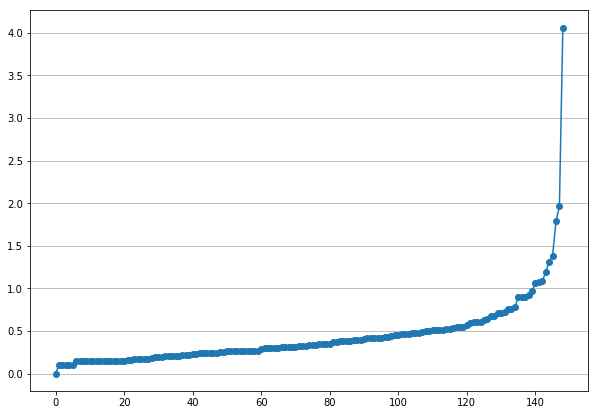

In [6]:
# Draw the graph of the grouping distances:
fig = plt.figure(figsize=(10, 7))
plt.plot(Z[:,2],'o-')
plt.grid(axis='y')

In [7]:
# Compute the clusters by cutting in the dendrogram:
nb_clust = 3 # number of clusters
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')

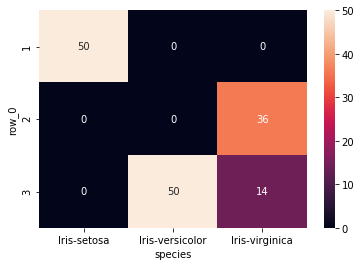

In [8]:
# Contingency table of species vs cluster labels
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

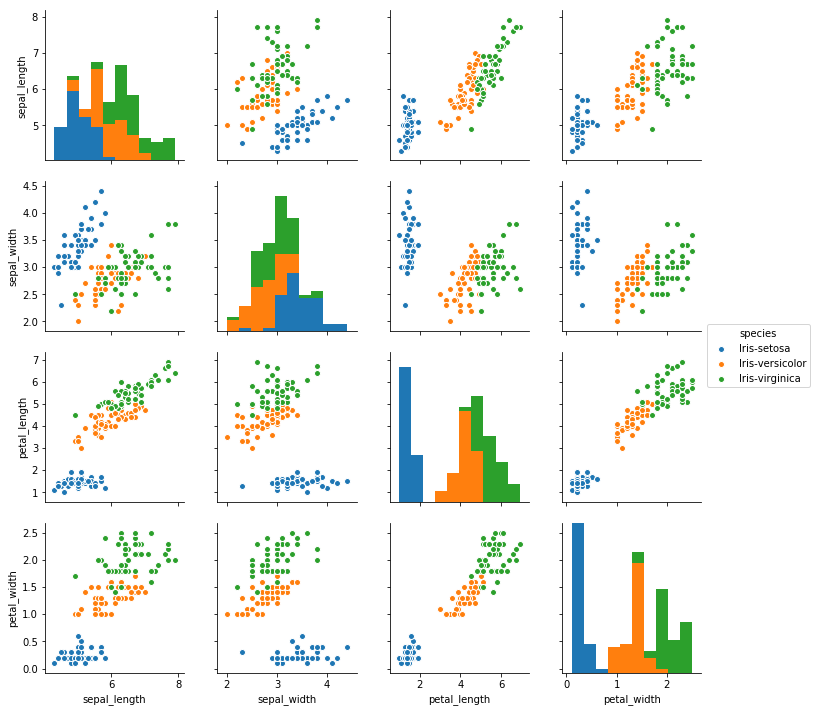

In [9]:
 sns.pairplot(data=df, hue="species")


## Single method

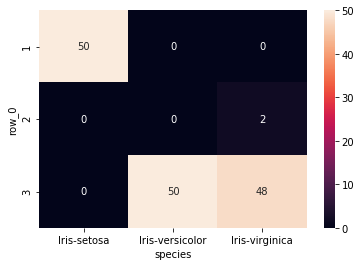

In [10]:
Z = sch.linkage(objects, method='single', metric='euclidean')
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

## Ward method

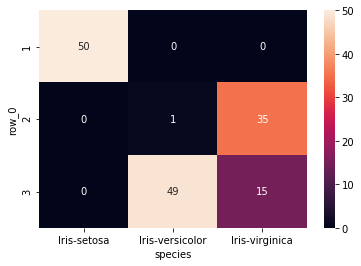

In [11]:
Z = sch.linkage(objects, method='ward', metric='euclidean')
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

## Complete method

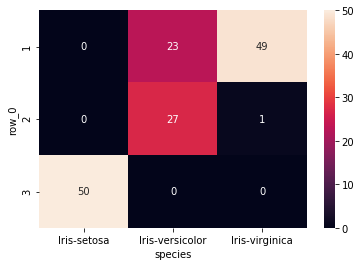

In [12]:
Z = sch.linkage(objects, method='complete', metric='euclidean')
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

## Manhattan distance

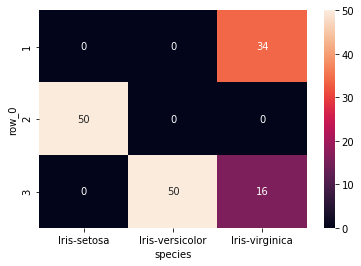

In [13]:
# Complete method
Z = sch.linkage(objects, method='complete', metric='cityblock')
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

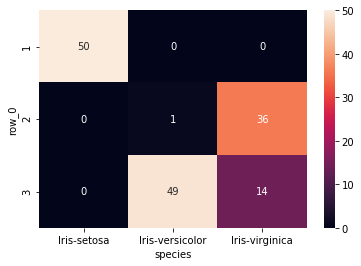

In [14]:
# Complete method
Z = sch.linkage(objects, method='average', metric='cityblock')
clusters = sch.fcluster(Z, nb_clust, criterion='maxclust')
crosstab = pds.crosstab(clusters,classes)
sns.heatmap(crosstab, annot=True)

## Silhoutte

In [15]:
# Compute the silhouette coefficient
metrics.silhouette_score(objects.values, clusters, metric='euclidean', sample_size=None)

0.5535372928319986

Silhouette - 

In [16]:
# Compute the entropy of each clusters with:
proba = crosstab.values/crosstab.values.sum(axis=1, keepdims=True) # divide each element of a row by the sum of the row
print(proba)
entropy = [stats.entropy(row, base=2) for row in proba]
print("entropy of each cluster: ", entropy)

[[1.         0.         0.        ]
 [0.         0.02702703 0.97297297]
 [0.         0.77777778 0.22222222]]
entropy of each cluster:  [0.0, 0.17925606692832147, 0.7642045065086203]


In [19]:
# Compute the NMI 
metrics.normalized_mutual_info_score(classes, clusters) #, average_method = 'max')

0.777705890628253

Explication des coefficients voir corrigé